# Gamma Distribution

Dustin D. Gerrard
<br>
September 2018

This notebook describes the Gamma distribution.
<br>
<br>
https://en.wikipedia.org/wiki/Gamma_distribution
<br>
http://reliawiki.org/index.php/The_Gamma_Distribution
<br>
<br>
Examples:
* Reliability of products.
* Commonly used in queueing theory.

<h2><center><u> Gamma p.d.f.</u></center></h2>

\begin{equation*}
\Large
f(x; k, \Theta) = \frac{1}{\Gamma(k)\Theta}x^{k-1}e^{-x/\Theta}
\end{equation*}

<h2><center><u>Gamma Function </u></center></h2>

\begin{equation*}
\Large
\Gamma(x) = (x-1)!
\end{equation*}

\begin{equation*}
\Large
\Gamma(x) = \int_{0}^{\infty}x^{z-1}e^{-x}dx
\end{equation*}

In [1]:
from IPython.core.display import Image
# from PIL import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/e/e6/Gamma_distribution_pdf.svg', width=560, height=560) 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma as gamma_dist
from scipy.special import erf, erfinv, gamma, gammainc

# Gamma Distribution using scipy

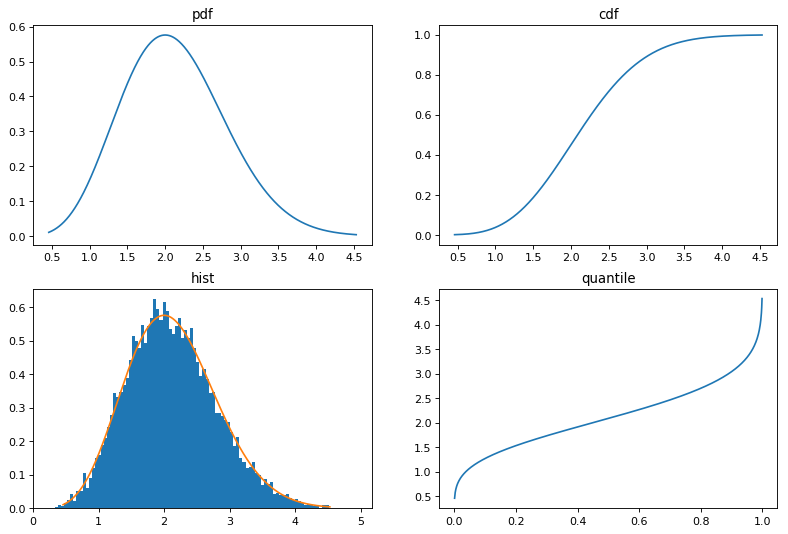

In [3]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html
k = 5
x = np.linspace(chi.ppf(0.001, k), chi.ppf(0.999, k), 1000) # ppf = percent point function
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(221)
plt.plot(x, chi.pdf(x,k)) # pdf = probability distribution function
plt.title('pdf')
plt.subplot(222)
plt.plot(x, chi.cdf(x,k)) # cdf = cumumlative distribution function
plt.title('cdf')
plt.subplot(223)
r = chi.rvs(k, size=10000) # rvs = random variates
plt.hist(r, 100, density=True)
plt.plot(x, chi.pdf(x,k))
plt.title('hist')
r = chi.rvs(k, size=100000)
plt.subplot(224)
q = np.linspace(0.001, 0.999, 1000)
plt.plot(q, chi.ppf(q,k))
plt.title('quantile')
plt.show()

In [4]:
mean, var, skew, kurt = chi.stats(k, moments='mvsk')
median = chi.median(k,loc=0, scale=1)

# Gamma Distribution explicitly in Python

In [5]:
def chiDist(k):
    Xs = np.linspace(0, 10+k/10, 101)
    Ys = 1/(pow(2,k/2-1)*gamma(k/2))*pow(Xs,k-1)*np.exp(-pow(Xs,2)/2)
    CDFs = gammainc(k/2, pow(Xs,2)/2)
    return Xs, Ys, CDFs

### pdf - probability distribution function

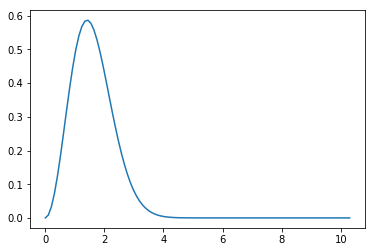

In [6]:
sigma = 0.5 # mean and standard deviation
Xs, Ys, CDFs = chiDist(3)
plt.plot(Xs,Ys)
plt.show()

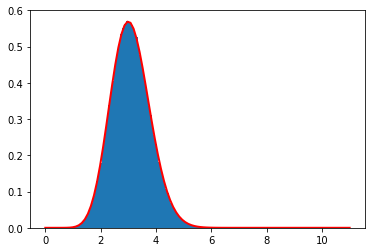

In [7]:
k = 10
A = np.sqrt(np.random.chisquare(k, 1000000))
Xs, Ys, CDFs = chiDist(k)
fig, ax1 = plt.subplots()
plt.hist(A, 100, density=True)
plt.plot(Xs, Ys, linewidth=2, color='r')
plt.show()

### cdf - cumulative distribution function

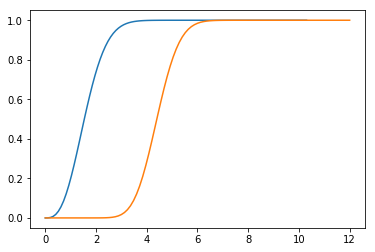

In [8]:
k = 3 # mean and standard deviation
Xs, Ys, CDFs = chiDist(k)
k2 = 20
Xs2, Ys2, CDFs2 = chiDist(k2)
plt.plot(Xs,CDFs)
plt.plot(Xs2,CDFs2)
plt.show()

### Quantile

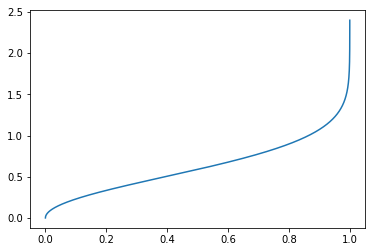

In [9]:
lambda0 = 2
Fs = np.linspace(0,1,100001)
Qs = sigma*np.sqrt(-2*np.log(1-Fs))
plt.plot(Fs,Qs)
plt.show()